In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv(r'IMDB-Dataset.csv')

In [3]:
df


Ratings                                            Reviews  \
0           1.0  *Disclaimer: I only watched this movie as a co...   
1           1.0  I am writing this in hopes that this gets put ...   
2           1.0  Really, I could write a scathing review of thi...   
3           1.0  If you saw the other previous spoof movies by ...   
4           1.0  This movie I saw a day early for free and I st...   
...         ...                                                ...   
149995     10.0  GoldenEye (1995) is my number 1 personal favor...   
149996     10.0  *** 1/2Starring: Pierce Brosnan, Izabella Scor...   
149997     10.0  I've given this film a 10, not just because I ...   
149998     10.0  I absolutely adore this movie. What a comeback...   
149999     10.0  I rented Boogie Nights last week and I could t...   

                Movies                                           Resenhas  
0       Disaster Movie  * Isenção de responsabilidade: eu só assisti e...  
1       Disaster Movie  Estou escrevendo isso na esperança de que isso...  
2       Disaster Movie  Realmente, eu poderia escrever uma crítica con...  
3       Disaster Movie  Se você viu os outros filmes falsificados ante...  
4       Disaster Movie  Este filme eu vi um dia cedo de graça e ainda ...  
...                ...                                                ...  
149995       GoldenEye  GoldenEye (1995) é o meu filme favorito pessoa...  
149996       GoldenEye  Estrelando: Pierce Brosnan, Izabella Scorupco,...  
149997       GoldenEye  Eu dei 10 a este filme, não apenas porque eu g...  
149998       GoldenEye  Eu absolutamente adoro este filme. Que retorno...  
149999   Boogie Nights  Aluguei o Boogie Nights na semana passada e pu...  

[150000 rows x 4 columns]

In [4]:
from nltk.corpus import stopwords
stop_words= stopwords.words('english')
new_stopwords = ["movie","one","film","would","shall","could","might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ravik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
def remove_special_character(content):
    return re.sub('\[[^&@#!]]*\]','',content)

def remove_url(content):
    return re.sub(r'http\S+','',content)

def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

def contraction_expansion(content):
    content = re.sub(r"won\'t","would not",content)
    content = re.sub(r"don\'t","do not",content)
    content = re.sub(r"can\'t","can not",content)
    content = re.sub(r"shouldn\'t","should not",content)
    content = re.sub(r"needn\'t"," need not",content)
    content = re.sub(r"has\'t"," has not",content)
    content = re.sub(r"have\'t"," have not",content)
    content = re.sub(r"weren\'t"," were not",content)
    content = re.sub(r"didn\'t","did not",content)
    content = re.sub(r"n\'t"," not",content)
    content = re.sub(r"\'re"," are",content)
    content = re.sub(r"\'s"," is",content)
    content = re.sub(r"\'d"," would",content)
    content = re.sub(r"\'ll"," will",content)
    content = re.sub(r"\'t"," not",content)
    content = re.sub(r"\'ve"," have",content)
    content = re.sub(r"\'m","am",content)
    return content


def data_cleaning(content):
    content = remove_special_character(content)
    content = remove_url(content)
    content = contraction_expansion(content)
    content = remove_stopwords(content)
    return content

In [7]:

df['Reviews_clean']=df['Reviews'].apply(data_cleaning)
df.head(5)

Ratings                                            Reviews          Movies  \
0      1.0  *Disclaimer: I only watched this movie as a co...  Disaster Movie   
1      1.0  I am writing this in hopes that this gets put ...  Disaster Movie   
2      1.0  Really, I could write a scathing review of thi...  Disaster Movie   
3      1.0  If you saw the other previous spoof movies by ...  Disaster Movie   
4      1.0  This movie I saw a day early for free and I st...  Disaster Movie   

                                            Resenhas  \
0  * Isenção de responsabilidade: eu só assisti e...   
1  Estou escrevendo isso na esperança de que isso...   
2  Realmente, eu poderia escrever uma crítica con...   
3  Se você viu os outros filmes falsificados ante...   
4  Este filme eu vi um dia cedo de graça e ainda ...   

                                       Reviews_clean  
0  watched conditional see films not caught dead ...  
1  writing hopes gets put previous review anyone ...  
2  write scathing review turd iam going making ob...  
3  saw previous spoof movies two horrible know al...  
4  saw day early free still feel like got ripped ...

In [8]:
df.isna().sum()
#missing values

Ratings           0
Reviews           0
Movies           25
Resenhas          0
Reviews_clean     0
dtype: int64

In [9]:
#basic data statistics
df['Ratings'].describe()

count    150000.000000
mean          5.500000
std           2.872291
min           1.000000
25%           3.000000
50%           5.500000
75%           8.000000
max          10.000000
Name: Ratings, dtype: float64

In [10]:
df['Reviews'].describe()

count                                                150000
unique                                               149780
top       Really the best animation that ever existed I ...
freq                                                      5
Name: Reviews, dtype: object

In [11]:
print('Total number of unique reviews: %s' % df.Reviews.nunique())
print('Total number of unique movie names: %s' % df.Movies.nunique())
print('Total number of ratings given: %s' % df.Ratings.count())

Total number of unique reviews: 149780
Total number of unique movie names: 14206
Total number of ratings given: 150000


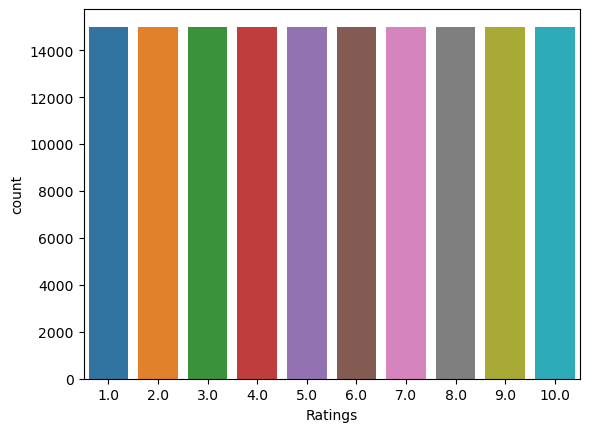

Ratings
1.0     15000
2.0     15000
4.0     15000
3.0     15000
5.0     15000
6.0     15000
8.0     15000
7.0     15000
10.0    15000
9.0     15000
Name: count, dtype: int64


In [12]:
#EDA

sns.countplot(x=df['Ratings'])
plt.show()
print(df['Ratings'].value_counts())

(-0.5, 1499.5, 799.5, -0.5)

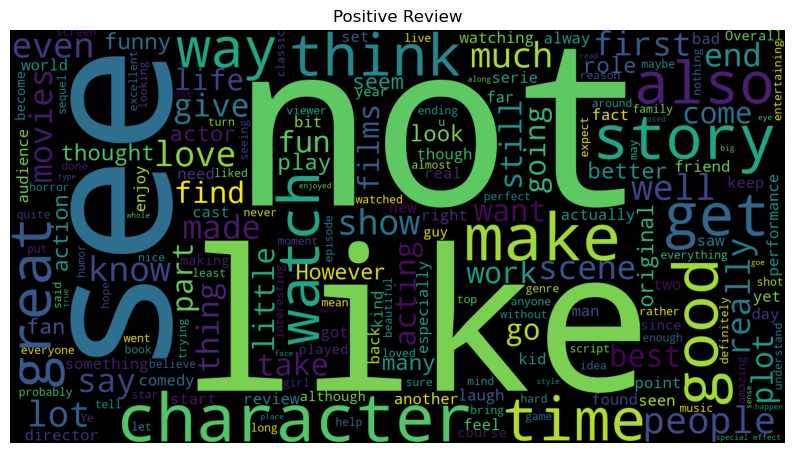

In [13]:
#important words from positive reviews
sentences=df['Reviews']
pos=' '.join(map(str,sentences[df['Ratings']>=7]))
neg=' '.join(map(str,sentences[df['Ratings']<=4]))

pos_wordcloud = WordCloud(width = 1500, height = 800,
                background_color='black',
                stopwords = stop_words,
                min_font_size = 15).generate(pos)


plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Positive Review')
plt.axis('off')

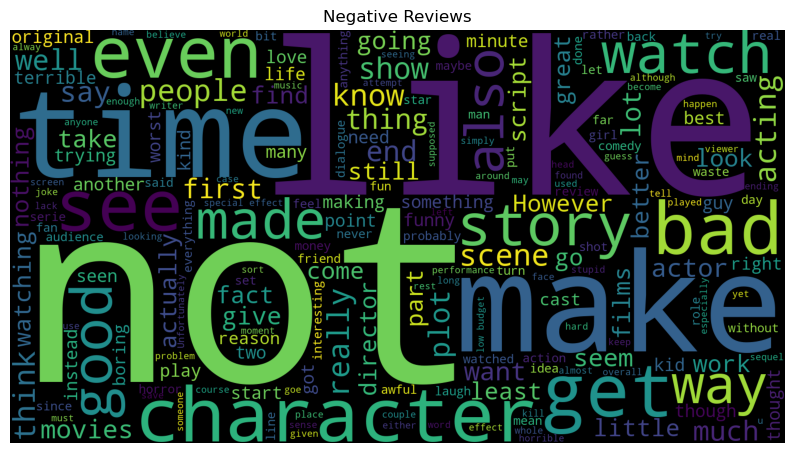

In [14]:
#important words from negative reviews

neg_wordcloud = WordCloud(width= 1500, height= 800,
                background_color ='black',
                stopwords= stop_words,
                min_font_size = 15).generate(neg)

plt.figure(figsize=(10,10))
plt.imshow(neg_wordcloud)
plt.title('Negative Reviews')
plt.axis('off')
plt.show()


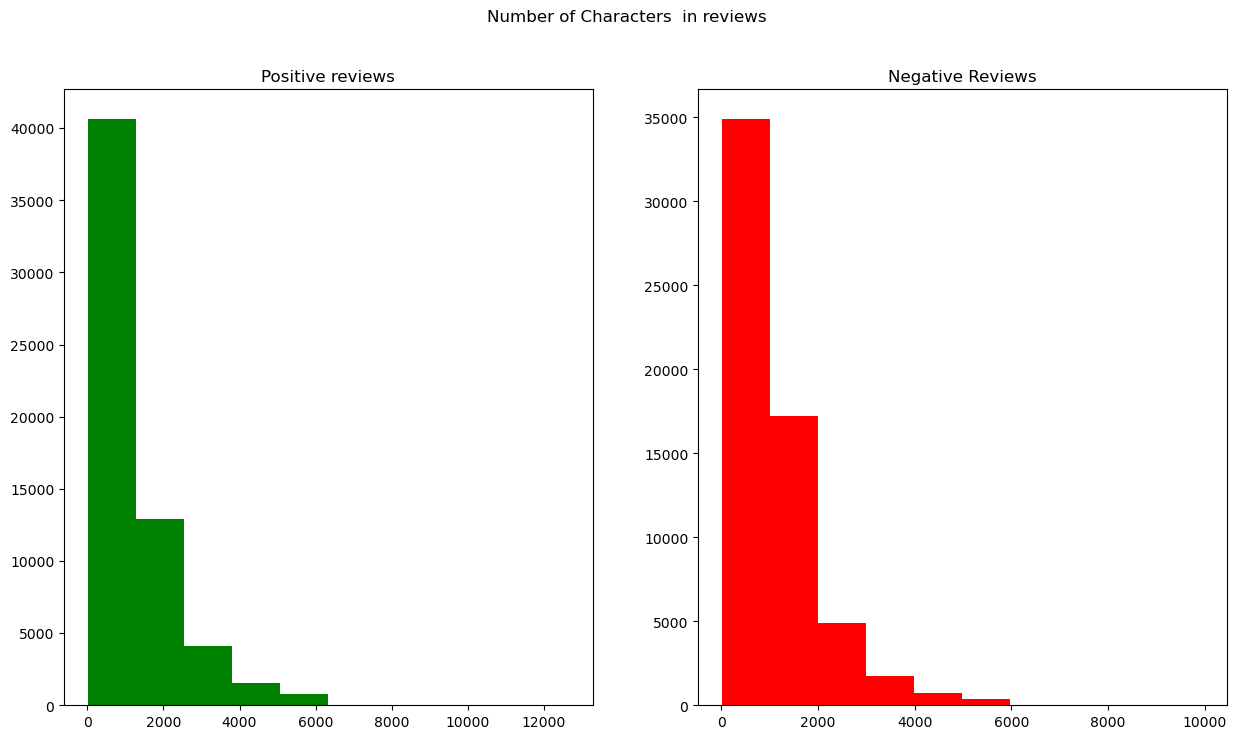

In [15]:
figure,(pos_ax, neg_ax)=plt.subplots(1,2,figsize=(15,8))
len_pos_review=df[df['Ratings']>=7]['Reviews'].str.len()
pos_ax.hist(len_pos_review,color='green')
pos_ax.set_title('Positive reviews')
len_neg_review=df[(df['Ratings']<=4)]['Reviews'].str.len()
neg_ax.hist(len_neg_review, color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Number of Characters  in reviews')
plt.show()

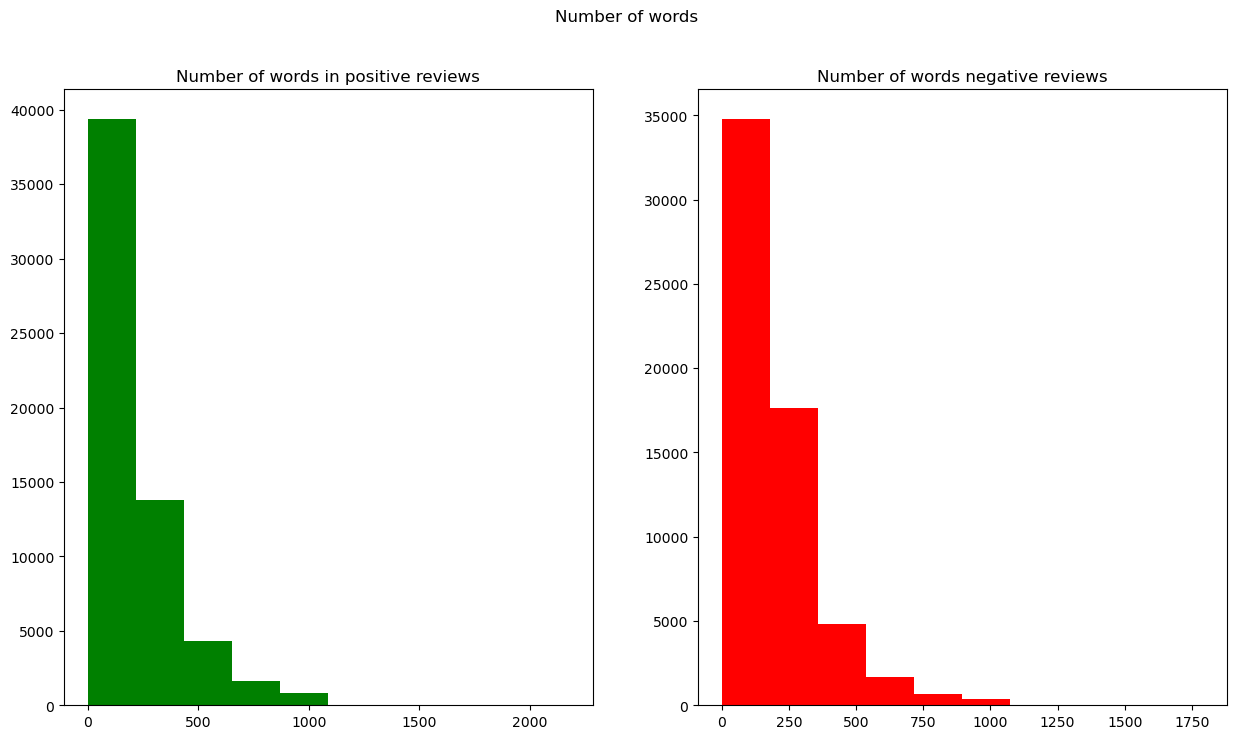

In [16]:
 #visualization of number of words in reviews
    
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
pos_word=df[df['Ratings']>=7]['Reviews'].str.split().map(lambda review: len(review))
pos_ax.hist(pos_word,color='green')
pos_ax.set_title('Number of words in positive reviews')
neg_word=df[df['Ratings']<=4]['Reviews'].str.split().map(lambda review: len (review))
neg_ax. hist(neg_word,color='red')
neg_ax. set_title('Number of words negative reviews')
figure.suptitle('Number of words')
plt.show()

Text(0.5, 0.98, 'Average word length in reviews')

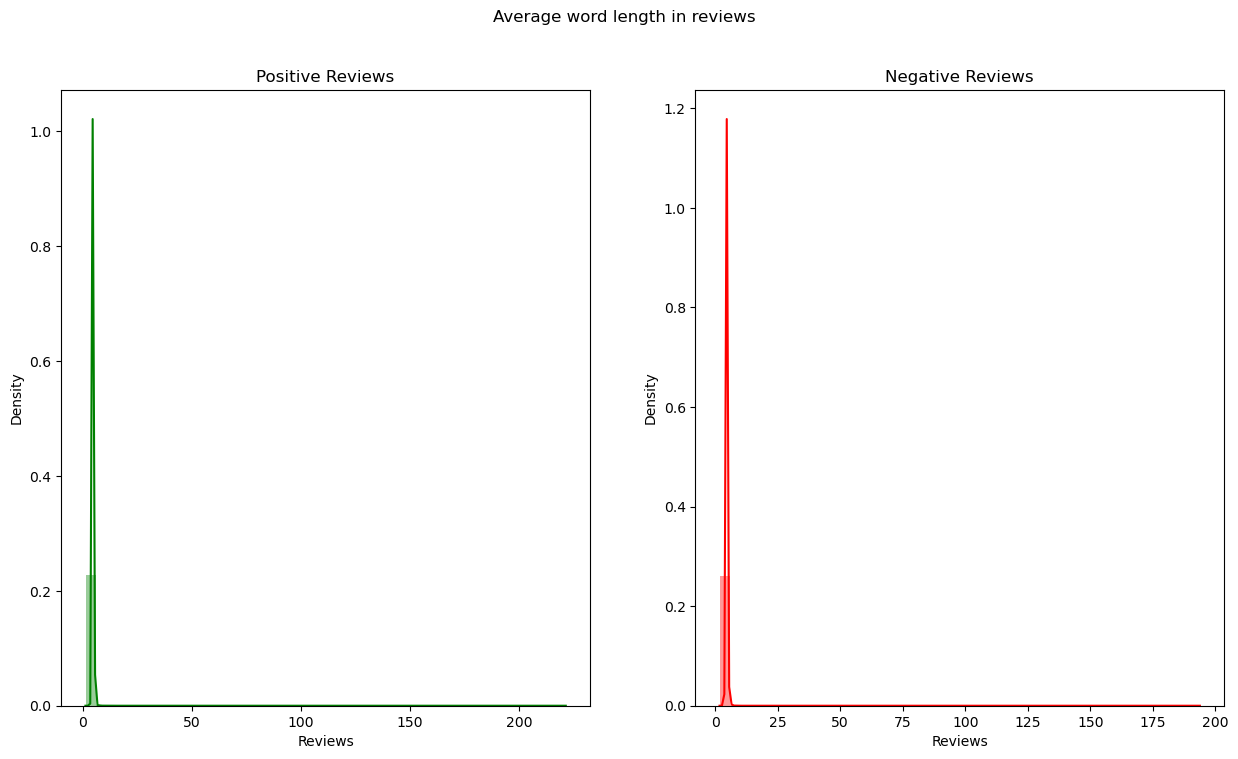

In [17]:
#visualization averge of words in reviews

figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
pos_word=df[df['Ratings']>=7]['Reviews'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(pos_word.map(lambda x: np.mean(x)),ax=pos_ax,color='green')
pos_ax.set_title('Positive Reviews')
neg_word=df[df['Ratings']<=4]['Reviews'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(neg_word.map(lambda x: np.mean(x)),ax=neg_ax,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Average word length in reviews')
             
             

In [18]:
def get_top_text_ngrams(corpus, n, g):#count vectorization --> words into vectors. n grams-->occurence of multiple words together
    vec= CountVectorizer(ngram_range=(g,g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word,sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key =lambda x: x[1], reverse=True)
    return words_freq[:n]

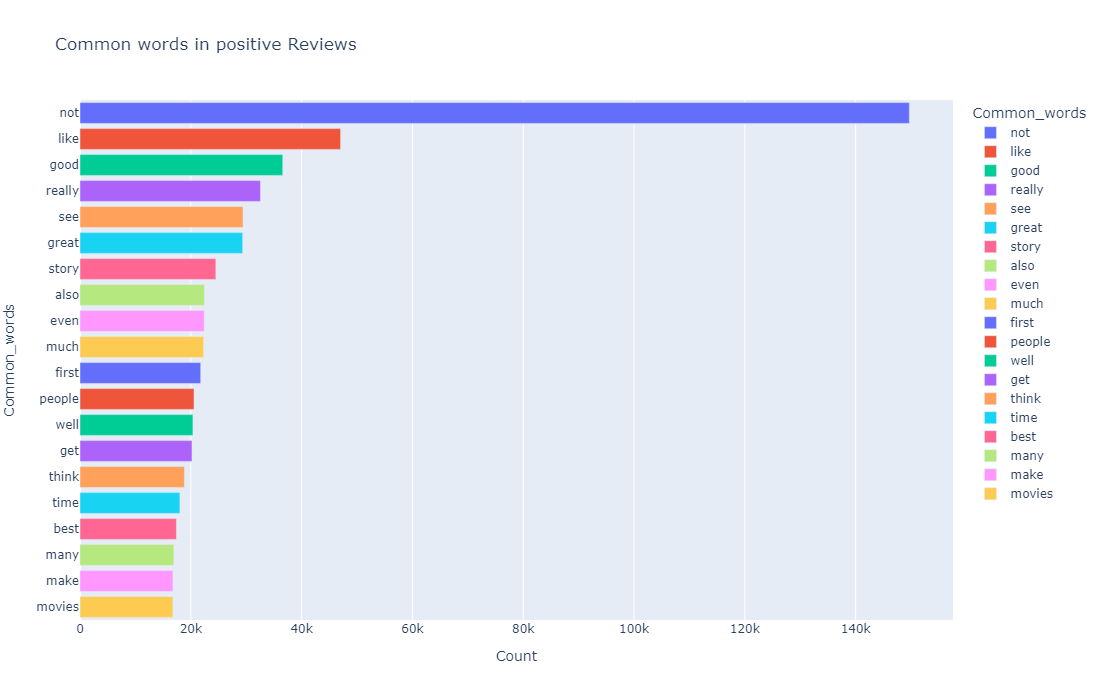

In [19]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,1)
most_common_uni = dict(most_common_uni)
temp=pd.DataFrame(columns = ["Common_words",'Count'])
temp["Common_words"]= list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words",title='Common words in positive Reviews',width=700, height=700, color='Common_words')
fig.show()




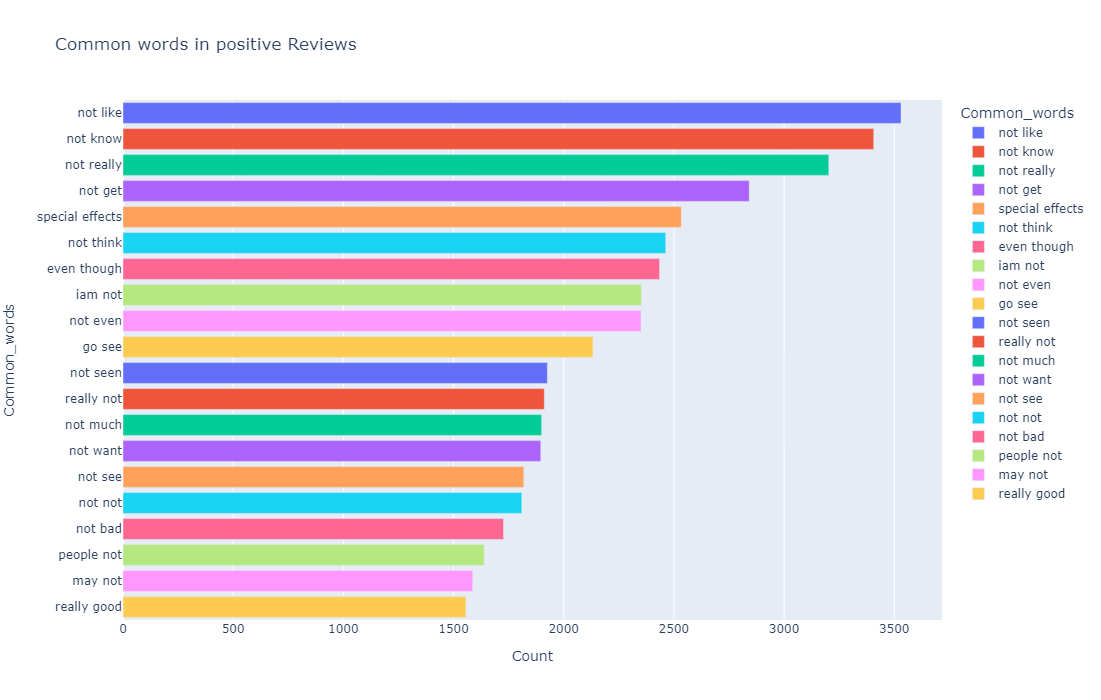

In [20]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,2)
most_common_uni = dict(most_common_uni)
temp=pd.DataFrame(columns = ["Common_words",'Count'])
temp["Common_words"]= list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words",title='Common words in positive Reviews',width=700, height=700, color='Common_words')
fig.show()

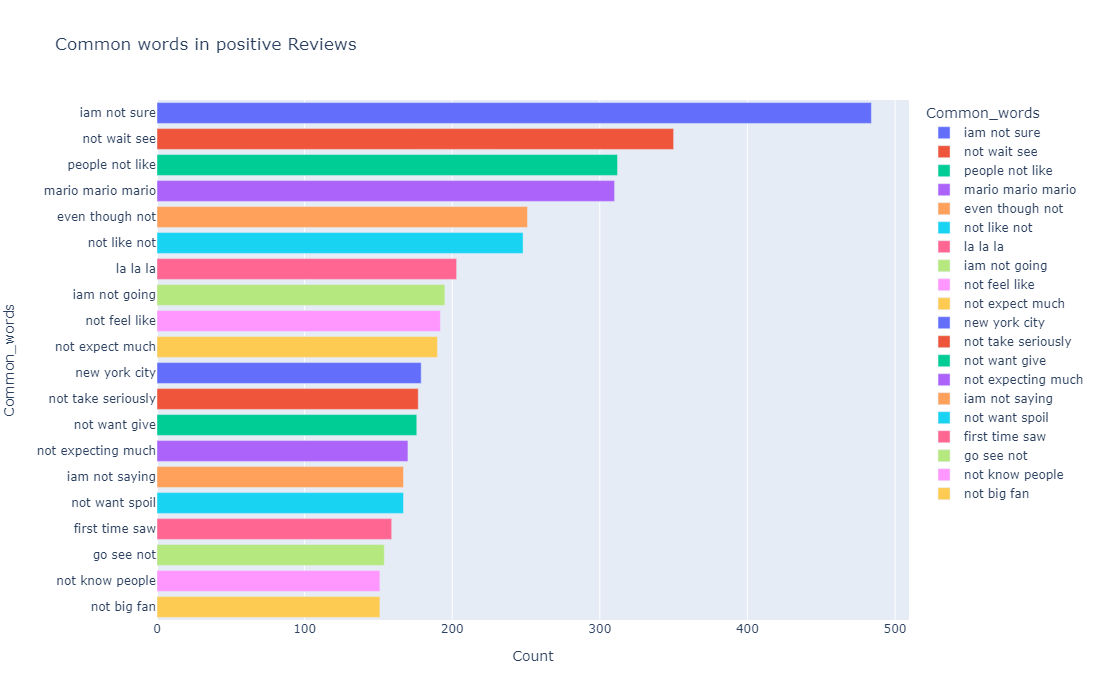

In [21]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,3)
most_common_uni = dict(most_common_uni)
temp=pd.DataFrame(columns = ["Common_words",'Count'])
temp["Common_words"]= list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words",title='Common words in positive Reviews',width=700, height=700, color='Common_words')
fig.show()

In [22]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']>=7)&(df['Reviews'].str.contains("not like| not want|"))]

Reviews  \
48406   Steven Seagal might be getting old and he also might not have the same shape he had 20 years ago but he certainly still can make a movie great just by being in it.Actually, this movie itself is pretty good. A lot of money has been spent on making it realistic and entertaining. Reminds you of the good old days when Van Damme and Seagal were backed by big budgets.Mercenary for Justice is a colorful film filled with explosive action scenes, great dialogues and one-liners, fight scenes in which Seagal actually takes part. It had been a while since I really saw him perform anything close to his Aikido moves. The balance between realism and utter irrealism is just perfect.You got to remind yourself that action movies are a genre in themselves. Lots of folks try to bring them down for various reasons...they just don't get the point. Just like romantic comedies and politic thrillers all follow some basic rules, action movies are also lead by a set of pre-requisites that you just expect to ...   
90001   "The human race has one really effective weapon, and that is laughter."-Mark TwainI am not sure when it became OK to keep making movies that virtually no one goes to see, but in the case of the recent plethora of spoof films I for one am glad that they continue.Now I know a lot of people out there cannot even fathom why people would enjoy such stupidity, but that is just it, you don't need to understand, sometimes people should just let go and be stupid.Stupid is the perfect word to describe "Disaster Movie" actually no matter how many times you say the word stupid, it would never be enough to justify just how stupid it is. But for me I absolutely love these stupid spoof movies.The "story", and I use this word very lightly, gives us Will, who is right in the middle of his Super Duper Sweeet Sixteen (even though he is actually 25) when the world starts coming under attack, from mostly meteorites, and tornado's, and earthquakes. Loosley following the "Cloverfeild" plot, Will must rea...   
90002                                                                                                                                  This movie made me appreciate him, you could really tell from his childhood tapes that he had a drive to do this stuff no one forced him to...he was just born to be, which made me feel bad about myself...and jealous. He is 16 and has accomplished so much, he doesn't forget where he came from and he seems very down to earth...unlike jaden smith who seemed like such a cocky little spoiled kid...and what was with miley? she looked so awkward with him on stage? really unattractive... The 3D was alright, the concert looked the best and the backstage stuff. He is just starting off so give him a break; 10 -15 years from now when he comes out with a bio it will probably be packed with a lot more drama heartbreak and struggle..all the crap everyone wants to see, but he hasn't been in the spotlight long enough and hes still a baby. so i think this was good enough for me   
90003   First off, I have seen a lot of films in my time and this is nowhere near the bottom 100 in acting, plot, humour, direction, wardrobe, makeup, or anything else. Unfortunately, the sheer volume of votes by people who haven't bothered to see it means this review will probably get lost and ignored, but I think this film deserves better than it's getting so I'll try anyway.I won't go over the plot because that can be seen above, except to say that its the usual love story sort of thing. I don't think the filmmakers were going for anything mindblowingly original here, nor is that what we end up with. What we do get is a sweet and lighthearted film that takes an everyday setting and throws in some fairly normal, although exaggerated, characters and builds a simple little interwoven romance around them. From the outset it's not difficult to predict what will happen in the end, the acting of Paris Hilton isn't what I'd call good but it's by n

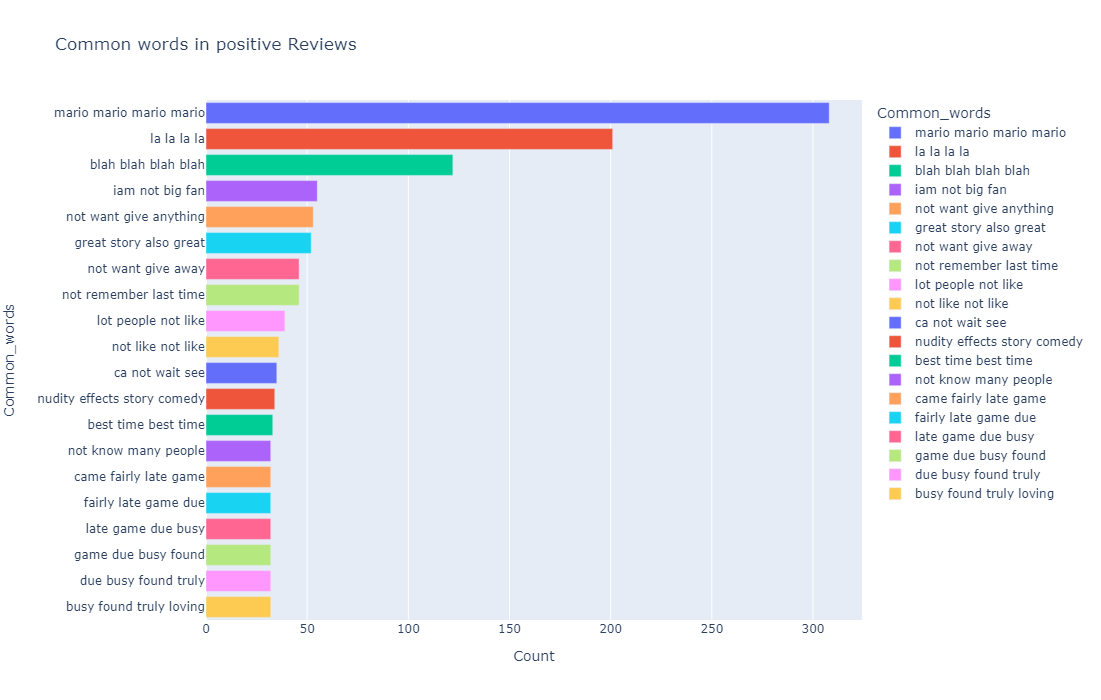

In [23]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,4)
most_common_uni = dict(most_common_uni)
temp=pd.DataFrame(columns = ["Common_words",'Count'])
temp["Common_words"]= list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words",title='Common words in positive Reviews',width=700, height=700, color='Common_words')
fig.show()

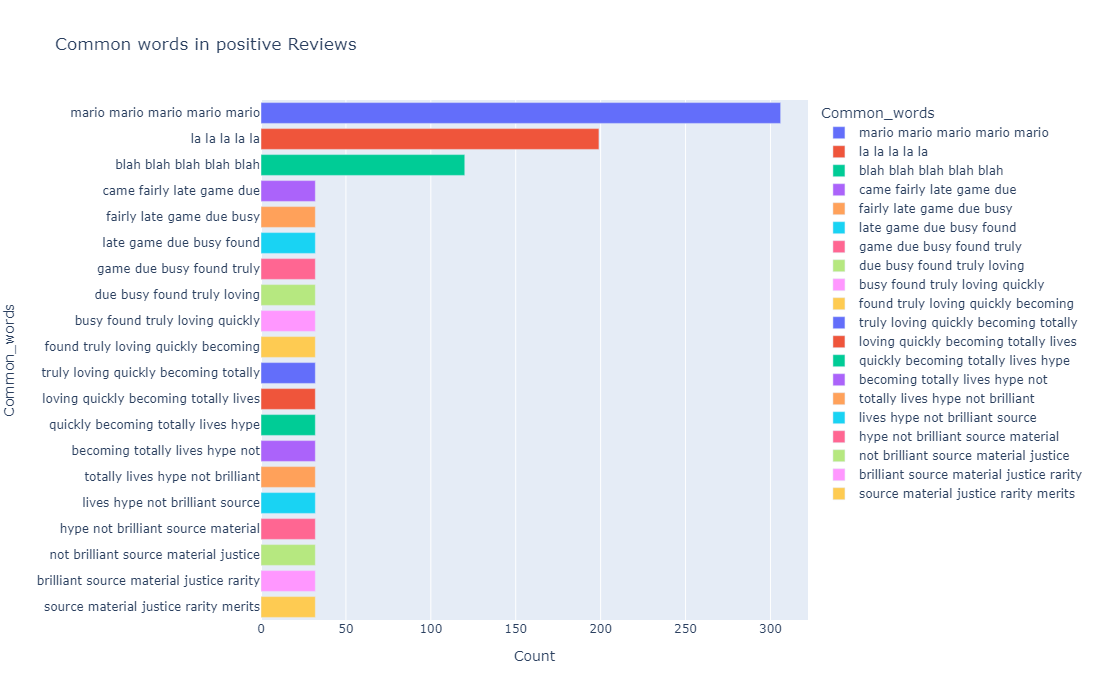

In [24]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,5)
most_common_uni = dict(most_common_uni)
temp=pd.DataFrame(columns = ["Common_words",'Count'])
temp["Common_words"]= list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words",title='Common words in positive Reviews',width=700, height=700, color='Common_words')
fig.show()

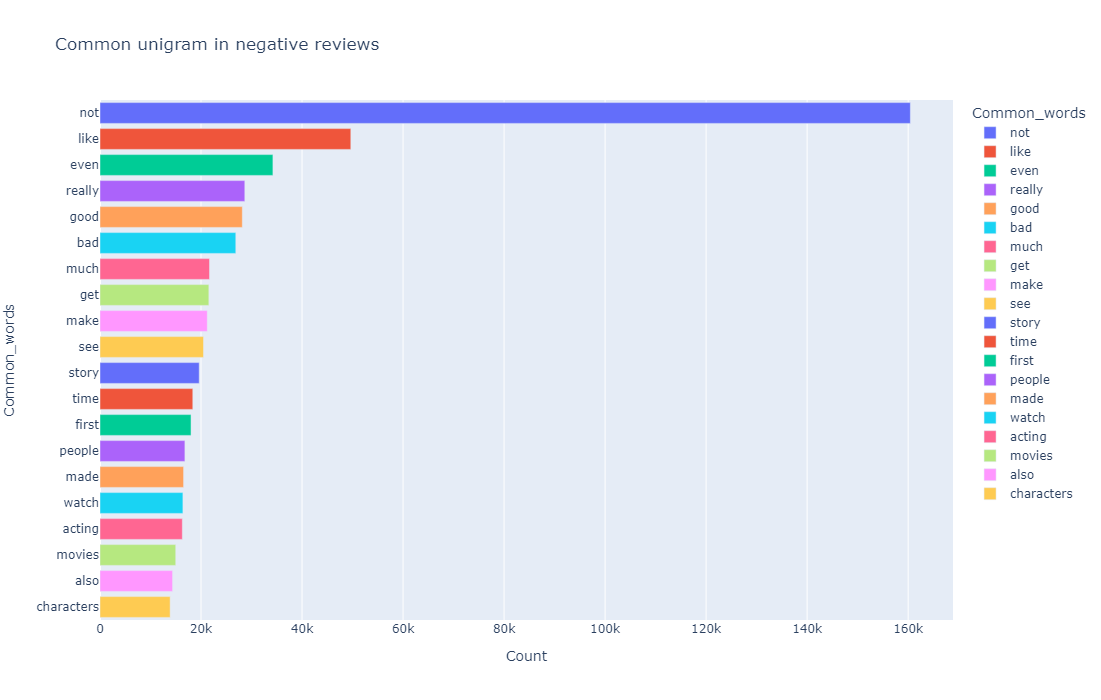

In [25]:
#clean

most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns=["Common_words",'Count'])
temp["Common_words"]=list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words",title='Common words in negative reviews',width=700,height=700,color='Common_words')
fig.show()

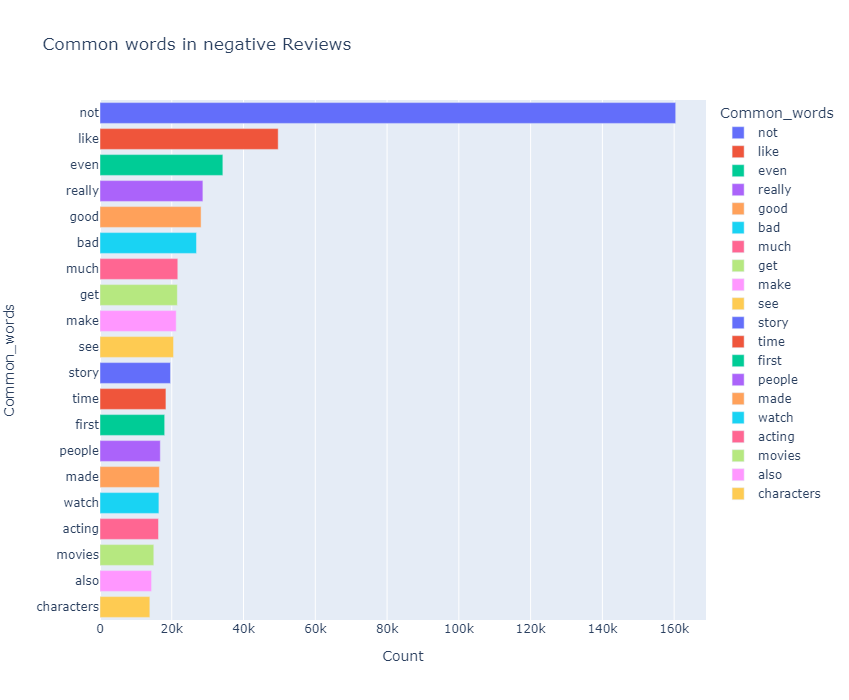

In [26]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],20,1)
most_common_uni = dict(most_common_uni)
temp=pd.DataFrame(columns = ["Common_words",'Count'])
temp["Common_words"]= list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words",title='Common words in negative Reviews',width=700, height=700, color='Common_words')
fig.show()

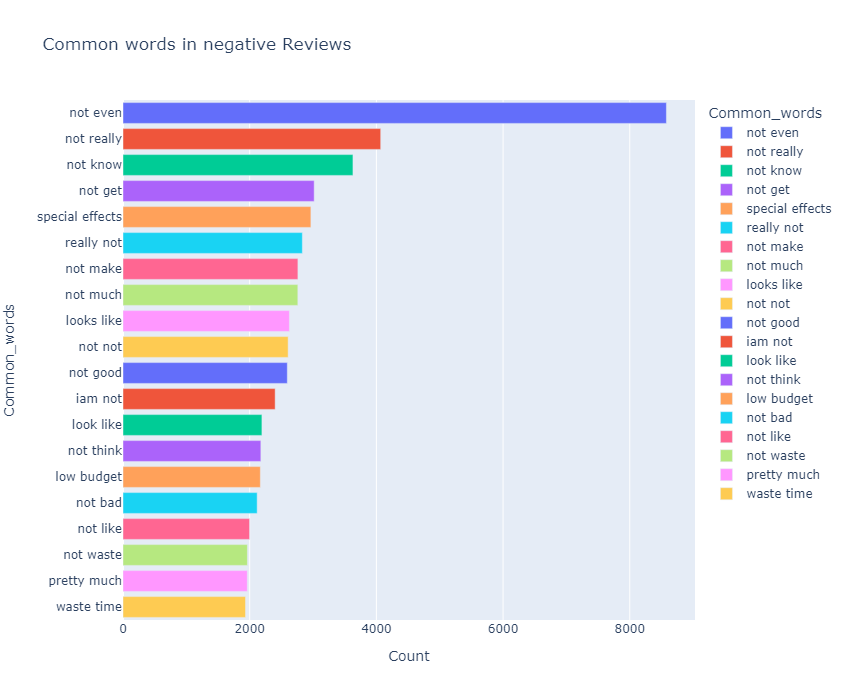

In [27]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],20,2)
most_common_uni = dict(most_common_uni)
temp=pd.DataFrame(columns = ["Common_words",'Count'])
temp["Common_words"]= list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words",title='Common words in negative Reviews',width=700, height=700, color='Common_words')
fig.show()

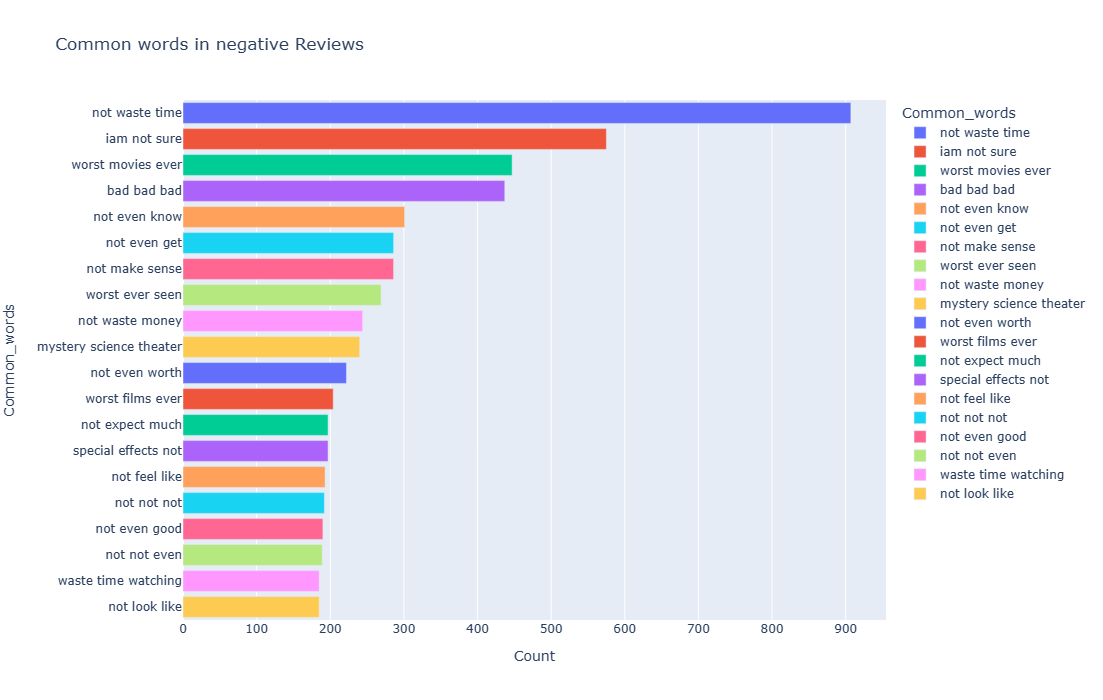

In [28]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],20,3)
most_common_uni = dict(most_common_uni)
temp=pd.DataFrame(columns = ["Common_words",'Count'])
temp["Common_words"]= list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words",title='Common words in negative Reviews',width=700, height=700, color='Common_words')
fig.show()

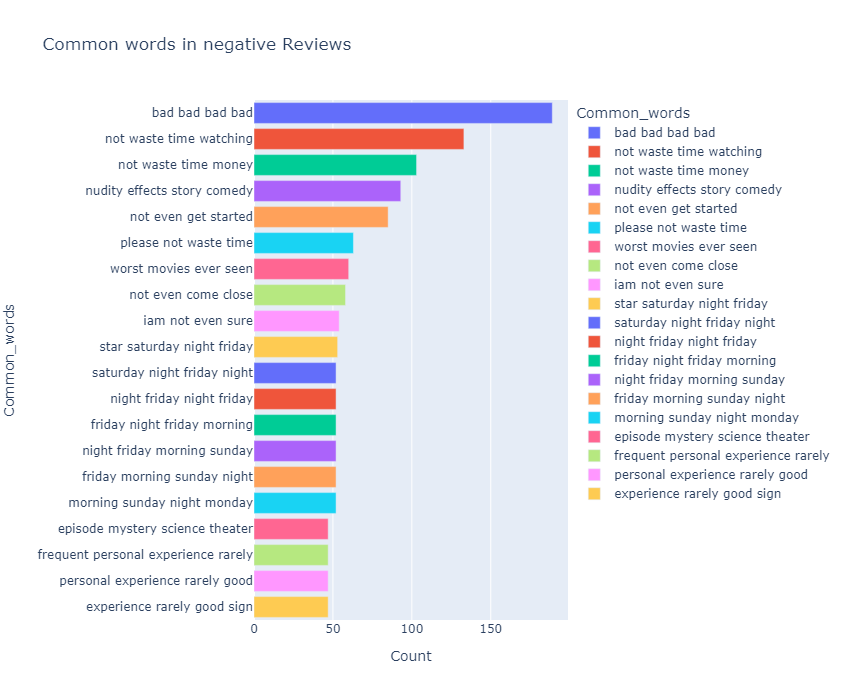

In [29]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4],20,4)
most_common_uni = dict(most_common_uni)
temp=pd.DataFrame(columns = ["Common_words",'Count'])
temp["Common_words"]= list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words",title='Common words in negative Reviews',width=700, height=700, color='Common_words')
fig.show()

In [30]:
pd.options.display.max_colwidth =1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']<=4)&(df['Reviews'].str.contains("good|great"))]

Reviews  \
3      If you saw the other previous spoof movies by these two horrible gentlemen, then you should know that this already will be bad. I'll tell you the truth, if you want to watch it as a brainless person (ironically meant for the stereotypical teenagers, which I am not) then you will laugh at it a bit. But if you judge it, even a little, the movie automatically fails. Why? Never ask that when it comes to these two men.Remember the good old Hollywood days whenever making a movie was about showing people a type of art, and also a story that kept you on the edge of your seat? Well whenever word hit that making films earned you loads of cash, then all these greedy people came in the picture and its quite pathetic. These two are no exception. We still have movie artists (most notably the genius that is Christopher Nolan). But these two guys just...well I've been writing so big words, let me put it in simple terms for these guys...These guys suck, they are not artists, but instead money cravi...   
6      I was given a free ticket to this film; so I can't complain that I was ripped off (except in that some 90 minutes of my life were irretrievably stolen from me). These sort of movies (Date Movie, Epic Movie, Meet the Spartans) haven't been funny for some time now but "Disaster Movie" has reached a new low. There wasn't one real laugh anywhere in the film, and most of the alleged "jokes" were actually painful. (There was a considerable amount of childish, mean-spirited stuff in the form of racist, sexist, and especially homophobic, garbage present, along with ample helpings of juvenile gross-outs.) None of the actors were even bothering to put up any pretense of acting. There is nothing hip, clever, or even mildly intelligent going on here. The entire film is from beginning to end crass, vulgar, irrational, and utterly humorless in any human sense. I know that in the past these sort of trash has made enough money to keep Seltzer et al., grinding them out but "Disaster Movie" may just...   
7                                                                                                                                                                                                                                                                                     OK, so "Disastrous" isn't an imaginative barb for this movie, but then there's not a shred of wit to the movie, so....I saw this movie for free. A friend who said he "pissed his pants" at the trailer had free passes. I think he's incontinent.A spoof of disaster movies might have been fun. This is not it. A couple disaster movies get referenced, not really spoofed. Instead, the "spoofing" is of recent movies of all genres, and of aspects of current pop-culture. Then again, how current is women's wrestling or the "Head On" commercials?If there's anything about it that's good, there's the 70 minute or so running time (where did they get 90 minutes?) and Nicole Parker seems like she might be good, if she had good material.   
11                                                                                                                                                                                                                                                                                                  I decided to go see this movie with some friends, just to have a laugh. We were hoping that it would be so bad that it would become funny. But it was just awful... I just cant take that kid seriously.Also, this movie just confirmed what we all knew, JB has an ego even bigger then Kayne West. The entire movie was like: "Look at me, i'm a talented singer and a good person! There is simply nothing that i can't do!"What the movie forgot to mention is that its his mommies fat cigar smoking managers that made JB. he's a puppet. This movie could make him look better, but it just buried him deeper. I'm starting to think that this was done on purpose because the fat c

In [31]:
pd.options.display.max_colwidth =1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']<=4)&(df['Reviews'].str.contains("saturday |great"))]

Reviews  \
12     Right so everyone here on IMDb is pretty much committed to giving this "movie"(if you can call it that) 1 out of 10 to get it to no.1 on the bottom 100 list. Trust me, they're right.I went to see it because I knew there was no way I could criticize this movie without seeing it.However, the film lacks any artistic merit whatsoever. It is full of the latest and greatest pop sensations of the Youtube generation, but all these names and flashy lights are just stuffing in the under cooked turkey that is this show.At the heart of this presentation is the message to never give up on your dreams, however the whole movie is just Bieber smiling, looking pretty and grooming his lesbian hair, and as mentioned in previous reviews, the theater was full of tween girls screaming their heads off every time he inhaled or exhaled. Someone really needs to teach the modern generation about cinema etiquette, or at least tell them to shut up for 10 seconds. I honestly don't know what this movie was tryin...   
17     'This movie contains no material likely to offend or harm' reads the trailer for this "film" which should be disregarded by anyone over the age of 12 or with an IQ greater than 6.What we have here is an exercise in self-indulgent nonsense. A long and painfully cringe-worthy experience which could easily have been slashed to 30 minutes and tossed aside to the biography channel. After all, think of the amazing musicians who have never warranted a 3D biopic lasting almost 2 hours... The use of 3D in this film seems to be more geared to keeping the attention of toddlers in the audience, as clearly there is nothing to be gained by showing any part of this story as if it was supposed to be a visual feast, which people talking and the occasional dance number certainly is not.The point of this film is undoubtedly to give young Mr. Bieber (or those who conduct his financial affairs) another way to print money, and keep the saccharin music movement in top gear. It is in fact an insult to the...   
24                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Its very successful movie as a propaganda of a political outlook but as a movie just waste of time. acting, costumes, scenario etc are so poor. I clearly say that this movie is filmed just for the propaganda of politicians just like...you know. In the future this movie can be great example for the worst movies and to show how a nation can be manipulated by these kind of politic and disgusting movies.   
37                                                                                                                            I don't get all the negative reviews. I watched it and really liked it. It was the art of cinema at its best. The acting, the direction, the screenplay... All of them are awesome. Whoever doesn't like this movie must be jealous of the greatness of the Great Leader and the New Turkey. He built roads, bridges and airports. He made Turkey a new country.I am so impressed that I wrote a poem for our Great Leader. Here is my poem:Thank you, O Great Leader for being so great! Without you, we would have been destroyed! Here, everybody loves you, O Great Leader! Wherever you go, people gather around and cheer: "Greetings to you, O Great Leader! We love you! Can you please not send me to prison on fabricated charges now?"Overall, 1 star for the effort because just like the fact that there can only be one Great Leader, there can be 

In [32]:
df['Label'] = df['Ratings'].apply(lambda x: '1' if x >= 7 else ('0' if x<=4 else '2'))
#Removing 
df=df[df.Label<'2']
data=df[['Reviews_clean','Label']]
print(data['Label'].value_counts())

Label
0    60000
1    60000
Name: count, dtype: int64


In [36]:
#Importing dependencies for feature engineering 

#FEATURE ENGINEERING:
#CREATE NEW FEATURES BY USONG OR TRANSFORMING THE EXISTING ONES
import sys
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from prettytable import PrettyTable
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer

In [37]:
# lemmatization of word 
# pre-processing technique used break a word down to its root meaning to identify similarities
class LemmaTokenizer(object):
    def __init__(self):
        self.wordnetlemma = WordNetLemmatizer()
    def __call__(self, reviews):
        return [self.wordnetlemma.lemmatize(word) for word in word_tokenize(reviews)]

In [38]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ravik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ravik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,1), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(1,1),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

In [46]:

#Feature Importance with Logistic Regression and Count Vectorizer with unigram
#Count vectoriser is a basic vectoriser which takes every token (in this case a word) from our data and is turned into a feature. 
#As a whole it converts a collection of text documents to a sparse matrix of token counts.

lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+----------------+------------------------+
|    Feature     |         Score          |
+----------------+------------------------+
|      able      |  0.08183914366314585   |
|   absolutely   |  0.03185870580197892   |
|     across     |  -0.05151198604858757  |
|      act       |  -0.14831790294914945  |
|     acting     |  -0.1925141007937706   |
|     action     |  0.26486608346785456   |
|     actor      |  -0.13152686397730629  |
|    actress     |  -0.1319564171493132   |
|     actual     |  -0.15784399914405528  |
|    actually    |  -0.03635200048421785  |
|      add       |  0.03406865328321849   |
|      age       |  0.040210886579512016  |
|     alien      |  -0.08426884161529034  |
|     almost     | -0.006952819402784454  |
|     along      |  0.15199046550340548   |
|    already     |  -0.18826907479811972  |
|      also      |  0.10552393498535395   |
|    although    |  0.21911394158981778   |
|     always     |  0.20700999466031214   |
|    amazing     |   0.883532921

In [47]:
#Feature Importance with TFIDF vectorizer and Logistic Regression with Unigram
#TF-IDF (term frequency–inverse document frequency) 
#vectorises words by taking into account the frequency of a word in a given document 
#and the frequency between documents.

lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=100:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+----------------+----------------------+
|    Feature     |        Score         |
+----------------+----------------------+
|      able      |  0.3794840052907103  |
|   absolutely   |  0.2529961687139577  |
|     across     | -0.1577131268586174  |
|      act       | -0.8940602714515706  |
|     acting     | -1.4463583500654096  |
|     action     |  2.2161304110234994  |
|     actor      | -1.1644506772041754  |
|    actress     | -0.8605792264890623  |
|     actual     | -0.8800871030699511  |
|    actually    | -0.28886264268164913 |
|      add       | 0.25736555991339494  |
|      age       |  0.5566925511723259  |
|     alien      | -0.31359249452400817 |
|     almost     | -0.1848664475856053  |
|     along      |  0.8676374635995932  |
|    already     | -1.0063213056984386  |
|      also      |  1.2156938890647426  |
|    although    |  1.2780265884599618  |
|     always     |  1.5882477833056814  |
|    amazing     |  4.265127143303661   |
|    american    |  0.504542313607

In [49]:
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(2,2), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(2,2),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

In [50]:
# Feature Importance with Logistic Regression and Count Vectorizer with Bigram

lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+-----------------------+------------------------+
|        Feature        |         Score          |
+-----------------------+------------------------+
|   absolutely nothing  |  -1.4191202651770847   |
|     academy award     |   0.7083351749481054   |
|        act like       |  -0.5377364137476965   |
|      acting good      |   0.6467039375685828   |
|       acting not      |  -0.4413069749223569   |
|      action movie     |   0.6972173212279039   |
|       action not      |  0.41143866492671394   |
|      action scene     |   0.3467977279410664   |
|    action sequence    |  0.26765205614171916   |
|     actor actress     |  -0.0205940975675937   |
|       actor not       |   -0.416891986139837   |
|      actually not     |  -0.11894862998273126  |
|    actually pretty    |  0.12294919218811932   |
|     actually quite    |  0.03674560479149586   |
|      adam sandler     |  0.35087212266004514   |
|         ai not        |  0.03369442989360028   |
|      almost every     |  -0.1

In [51]:
#Feature Importance with Logistic Regression and TFIDF Vectorizer with Bigram
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(tfidfvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=50:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+--------------------+----------------------+
|      Feature       |        Score         |
+--------------------+----------------------+
| absolutely nothing |  -2.754239613870716  |
|   academy award    |  1.1936175935851578  |
|      act like      |  -1.187922688013815  |
|    acting good     |  1.206460532392875   |
|     acting not     | -1.0982450770774852  |
|    action movie    |  1.4109033406585327  |
|     action not     |  0.7158538350090762  |
|    action scene    |  0.711556138385992   |
|  action sequence   |  0.5454979718180332  |
|   actor actress    | -0.18265023457428384 |
|     actor not      | -0.9355423342517136  |
|    actually not    | -0.40110860168873513 |
|  actually pretty   | 0.23238507508816497  |
|   actually quite   |  0.1227490255783491  |
|    adam sandler    |  1.0091613929682104  |
|       ai not       | 0.010076236879123356 |
|    almost every    | -0.29581100346287376 |
|     also good      |  2.026767166486827   |
|     also great     |  2.73952028

In [52]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']>=9)&(df['Reviews_clean'].str.contains("bad review"))].head(100)

Reviews  \
120047                                                                                                                                                                                                                                                               While I wouldn't call this the greatest movie ever made, it's not anywhere near as bad as other reviewers have made it out to be. An average rating of 5 or 6 stars would be fair, but 1.5 is harsh and totally undeserved.Ring of Terror feels like an episode of The Twilight Zone stretched to an hour. In fact, it's so much like a TV show that one wonders if it might not have been originally created as a pilot.If you're a fan of 1950s horror/suspense series like Thriller, The Veil, One Step Beyond, Tales of Tomorrow, and Alfred Hitchcock Presents, you'll likely find this a pleasant way to spend an hour, as I did.Normally I would only give this film 6 out of 10 stars, but because others have been panning it so unmercifully, I'm giving it a 9.   
120239                                                                                                                                                                                                                                                                                                   No idea why there are so many bad reviews here? I loved it; I thought it was a very advanced thoughtful film. The graphic were #killer. The comparison of video game culture and young girl culture was spot on. This film makes connections that I've never seen on the big screen but, do see in every day life.The casting was spot on, Hello 12 year-old girls are supposed to be a little annoying. I do wish that more directors would take color into more consideration the way this film does. T The highly stylized sets make the murder scenes more believable because everything is so unbelievable. How can you live in 2016 and not "get"a film about social media and accelerationism. #duh Someone explain this to me.   
120334  I don't understand the negative reviews for this movie.This deserve a 10 stars.Something is definitely wrong with people when they do not care for a positive message in a movie.This movie was beyond great,had a touch of everything.It shows what can happen when a person's influence can change lives.These young boys had no hope,they could not see a promising future.The streets are what they knew,and of course,some of you can't relate, but if you are a fair person,then you will try to understand it from that viewpoint.I was not raised in a bad neighborhood,nor the streets, and i still totally get this movie.Life is about sacrifices and there were many a lessons in this movie that are based on real life for so many young people out there.This is their reality, and however fate made an entrance in these young boys life.It brought them someone that made them believe in themselves. Whether dance is an art to you, or not.Only the true artistic, and creative minds can get this.The art of da...   
120408                                                                                                                                                                                                                                                                                                                                                                      watch this movie! very cool movie with just enough of all the stuff one would think coming from a horror movie entitled War Wolves!i usually look forward to movies w bad reviewsso please keep giving cool movies like this poor reviews!and yea the 3 old timers made a cool movie cooler! Adrianne bar-beau still kicks ares! and yes the movie was funny too! if ya reading this i suggest watching the movie. thank you all the horror movies are real in my mind! yes cool movie very cool. more movies like this should be made more people need to give poor reviews to cool movies i have lots a time o

In [53]:
#Vectorization with Count Vectorizer and TFIDF Vectorizer with Trigram
train,test=train_test_split(data,test_size=.3,random_state=42, shuffle=True)
countvect = CountVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(3,3), min_df=10,max_features=500)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer(), ngram_range=(3,3),min_df=10,max_features=500)
x_train_count = countvect.fit_transform(train['Reviews_clean']).toarray()
x_test_count = countvect.transform(test['Reviews_clean']).toarray()
x_train_tfidf = tfidfvect.fit_transform(train['Reviews_clean']).toarray()
x_test_tfidf = tfidfvect.transform(test['Reviews_clean']).toarray()
y_train = train['Label']
y_test = test['Label']

In [55]:
lgr = LogisticRegression()
lgr.fit(x_train_count,y_train)
lgr.score(x_test_count,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+---------------------------+-----------------------+
|          Feature          |         Score         |
+---------------------------+-----------------------+
|       acting not bad      |  -0.3968332730743154  |
|      acting not even      |  -1.7810465163509073  |
|      acting not good      |   -1.496361939951186  |
|     acting pretty good    |   0.6097406507691273  |
|   acting special effect   |  -0.4395539801340041  |
|      action scene not     |  -0.2172473398000836  |
|     action take place     |  0.04171528053974474  |
|       actor good job      |   0.5977238266397519  |
|      actor look like      |  -1.0629999856679533  |
|      actually not bad     |  -0.5342375416644181  |
|    actually pretty good   |   0.3108371805247073  |
|     almost every scene    |  -0.14300399101136382 |
|      almost feel like     |   0.5471163644400879  |
|        bad bad bad        |   -1.88317727903178   |
|        bad guy not        |  0.08765684375801375  |
|        bad not even       

In [56]:
#Feature Importance with Logistic Regression and TFIDF Vectorizer with Trigram

lgr = LogisticRegression()
lgr.fit(x_train_tfidf,y_train)
lgr.score(x_test_tfidf,y_test)
lgr.coef_[0]
i=0
importantfeature = PrettyTable(["Feature", "Score"])
for feature, importance in zip(countvect.get_feature_names_out(), lgr.coef_[0]):
    if i<=200:
        importantfeature.add_row([feature, importance])
        i=i+1
print(importantfeature)

+---------------------------+-----------------------+
|          Feature          |         Score         |
+---------------------------+-----------------------+
|       acting not bad      |  -0.45742523300693466 |
|      acting not even      |  -2.0679817578709905  |
|      acting not good      |  -1.6642536630935754  |
|     acting pretty good    |   0.6817897585652042  |
|   acting special effect   |  -0.5297872530016129  |
|      action scene not     |  -0.1794373953732035  |
|     action take place     |   0.0180428232197728  |
|       actor good job      |   0.5929244625732486  |
|      actor look like      |  -1.1789854819612076  |
|      actually not bad     |  -0.5626533171093462  |
|    actually pretty good   |   0.2960485305769535  |
|     almost every scene    |  -0.16409543532702967 |
|      almost feel like     |   0.5524814101192081  |
|        bad bad bad        |   -2.631170301678043  |
|        bad guy not        |  0.16623805531543107  |
|        bad not even       

In [58]:
#Feature Selection with Chi squared

#Feature selection is a way of selecting the subset of the most relevant features
#from the original features set by removing the redundant, irrelevant, or noisy features.

from sklearn.feature_selection import chi2
import numpy as np
N = 5000
Number = 1
featureselection = PrettyTable(["Unigram", "Bigram","Trigram"])
for category in train['Label'].unique():
    features_chi2 = chi2(x_train_tfidf, train['Label'] == category)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidfvect.get_feature_names_out())[indices]
    unigrams = [x for x in feature_names if len(x.split(' ')) == 1]
    bigrams = [x for x in feature_names if len(x.split(' ')) == 2]
    trigrams = [x for x in feature_names if len(x.split(' ')) == 3]
    print("%s. %s :" % (Number,category))
    print("\t# Unigrams :\n\t. %s" %('\n\t. '.join(unigrams[-N:])))
    print("\t# Bigrams :\n\t. %s" %('\n\t. '.join(bigrams[-N:])))
    print("\t# Trigrams :\n\t. %s" %('\n\t. '.join(trigrams[-N:])))
    Number += 1

1. 1 :
	# Unigrams :
	. 
	# Bigrams :
	. 
	# Trigrams :
	. first two movie
	. not whole lot
	. not really sure
	. not come across
	. not get wrong
	. not seem like
	. not not bad
	. movie like not
	. not great not
	. not imagine anyone
	. make u feel
	. iam not going
	. people not even
	. not special effect
	. not help think
	. not think anyone
	. not expect much
	. really look like
	. low budget horror
	. not sure whether
	. not not think
	. not think ever
	. not really want
	. not really say
	. not iam not
	. really feel like
	. pretty much every
	. thing not really
	. feel like not
	. not think much
	. not know whether
	. not much not
	. plot revolves around
	. not get not
	. not see not
	. not enough time
	. not need see
	. not not like
	. not want watch
	. not go far
	. spend much time
	. not help thinking
	. not care much
	. not really know
	. saturday night live
	. action take place
	. almost every scene
	. can not say
	. pop culture reference
	. night living dead
	. special eff

In [60]:
# Import prerequisite libraries
import sys
import numpy as np
import scipy as sp
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [61]:
model_1=LogisticRegression()

In [62]:
model_1.fit(x_train_tfidf,y_train)

LogisticRegression()

In [63]:
print("Precision Score on training dateset for Logistic Regression: %s" % precision_score(y_train,model_1.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Logistic Regression: %s" % roc_auc_score(y_train,model_1.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_1 =f1_score(y_train,model_1.predict(x_train_tfidf),average="weighted")
print("F1 Score ftraining dateset for Logistic Regression: %s" % f1_score_train_1)
print("Precision Score on test for Logistic Regression: %s" % precision_score(y_test,model_1.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Logistic Regression: %s" % roc_auc_score(y_test,model_1.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_1 =f1_score(y_test,model_1.predict(x_test_tfidf),average="weighted")
print("F1 Score for Logistic Regression: %s" % f1_score_1)

Precision Score on training dateset for Logistic Regression: 0.5875476190476191
AUC Score on training dateset for Logistic Regression: 0.6325048662837738
F1 Score ftraining dateset for Logistic Regression: 0.5427995322514674
Precision Score on test for Logistic Regression: 0.5806388888888889
AUC Score on test for Logistic Regression: 0.6235411208416468
F1 Score for Logistic Regression: 0.5351959547674974


In [94]:
model_2 = Pipeline(
    steps=[
        #("classifier", DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)),
    ("classifier", DecisionTreeClassifier())
    ]
)

In [95]:
model_2.fit(x_train_tfidf,y_train)

Pipeline(steps=[('classifier', DecisionTreeClassifier())])

In [96]:
print("Precision Score on training dateset for Decision Tree Classifier: %s" % precision_score(y_train,model_2.predict(x_train_tfidf),average='micro'))
print("AUC Score on training dateset for Decision Tree Classifier: %s" % roc_auc_score(y_train,model_2.predict_proba(x_train_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_train_2 =f1_score(y_train,model_2.predict(x_train_tfidf),average="weighted")
print("F1 Score training dateset for Decision Tree Classifier: %s" % f1_score_train_2)
print("Precision Score on test for Decision Tree Classifier: %s" % precision_score(y_test,model_2.predict(x_test_tfidf),average='micro'))
print("AUC Score on test for Decision Tree Classifier: %s" % roc_auc_score(y_test,model_2.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_2 =f1_score(y_test,model_2.predict(x_test_tfidf),average="weighted")
print("F1 Score for Decision Tree Classifier: %s" % f1_score_2)

Precision Score on training dateset for Decision Tree Classifier: 0.6115119047619048
AUC Score on training dateset for Decision Tree Classifier: 0.6748510621809478
F1 Score training dateset for Decision Tree Classifier: 0.5694527091477316
Precision Score on test for Decision Tree Classifier: 0.5753055555555555
AUC Score on test for Decision Tree Classifier: 0.6108615248612237
F1 Score for Decision Tree Classifier: 0.5303789324320235


In [97]:
y_predict1=model_1.predict(x_test_tfidf)
y_predict_prob1=model_1.predict_proba(x_test_tfidf)[:,1]

In [98]:
def confusion_matrix_plot(y_test,y_score):
    confmatrix = confusion_matrix(y_test,y_score)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(confmatrix)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, confmatrix[i, j], ha='center', va='center', color='red')
    plt.show()

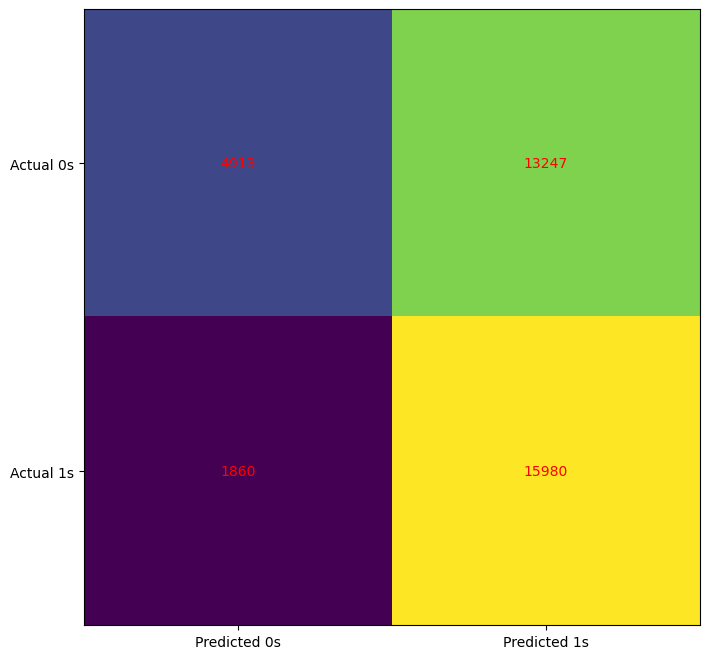

In [99]:
confusion_matrix_plot(y_test,y_predict1)

In [100]:
'''model_1 = Pipeline(
    steps=[
        #best base model("classifier", LogisticRegression(penalty='l2',dual=False, tol=0.0001, C=1.0, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None)),
    ("classifier", LogisticRegression())]
)'''
model_1=LogisticRegression(penalty='l2',dual=False, tol=0.0001, C=10, solver='lbfgs', max_iter=200, multi_class='auto', verbose=0, warm_start=False, n_jobs=None)


In [80]:
model_1.fit(x_train_tfidf,y_train)

LogisticRegression(C=10, max_iter=200)

In [81]:
print("Precision Score for Logistic Regression: %s" % precision_score(y_test,model_1.predict(x_test_tfidf),average='micro'))
print("Recall Score for Logistic Regression: %s" % recall_score(y_test,model_1.predict(x_test_tfidf),average='micro'))
print("AUC Score for Logistic Regression: %s" % roc_auc_score(y_test,model_1.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score_1 =f1_score(y_test,model_1.predict(x_test_tfidf),average="weighted")
print("F1 Score for Logistic Regression: %s" % f1_score_1)
print("Accuracy Score for Logistic Regression: %s" % accuracy_score(y_test,model_1.predict(x_test_tfidf)))

Precision Score for Logistic Regression: 0.5803611111111111
Recall Score for Logistic Regression: 0.5803611111111111
AUC Score for Logistic Regression: 0.6230506469029652
F1 Score for Logistic Regression: 0.5352977164585893
Accuracy Score for Logistic Regression: 0.5803611111111111


In [82]:
y_predict=model_1.predict(x_test_tfidf)
y_predict_prob=model_1.predict_proba(x_test_tfidf)[:,1]

In [83]:
def confusion_matrix_plot(y_test,y_score):
    confmatrix = confusion_matrix(y_test,y_score)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(confmatrix)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, confmatrix[i, j], ha='center', va='center', color='red')
    plt.show()

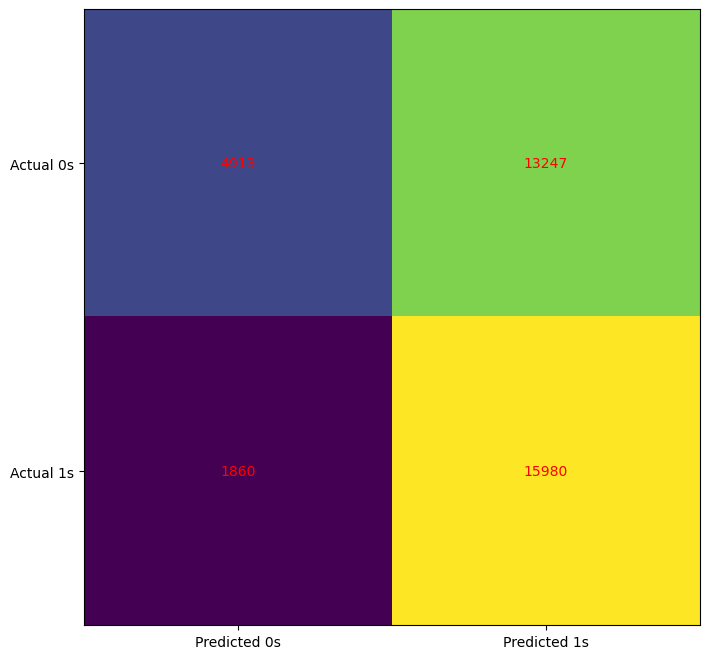

In [85]:
confusion_matrix_plot(y_test,y_predict)

In [101]:
model_4 = Pipeline(
    steps=[
        #("classifier", RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=15, min_samples_split=3, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None))
    ("classifier", RandomForestClassifier())]
)

In [89]:
model_4.fit(x_train_tfidf,y_train)

Pipeline(steps=[('classifier', RandomForestClassifier())])